In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

<h3>Data Importing</h3>

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data')

In [3]:
df.head(5)

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [4]:
df.shape

(624, 5)

In [5]:
x = df.values[:,1:5]
y = df.values[:,0]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                 random_state=100)

<h3>Decision Tree using ENTROPY</h3>

In [8]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',
                                  random_state=100)

In [9]:
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

<h3>Prediction</h3>

In [10]:
y_pred = clf_entropy.predict(x_test)

In [11]:
y_pred=pd.Series(y_pred)

In [12]:
pd.DataFrame({'X_test':df['B'],'Y_pred':y_pred}).head(5)

,X_test,Y_pred
0,R,R
1,R,L
2,R,R
3,R,L
4,R,R


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
cf = confusion_matrix(y_test,y_pred)

<h3>Confusion Metrix</h3>

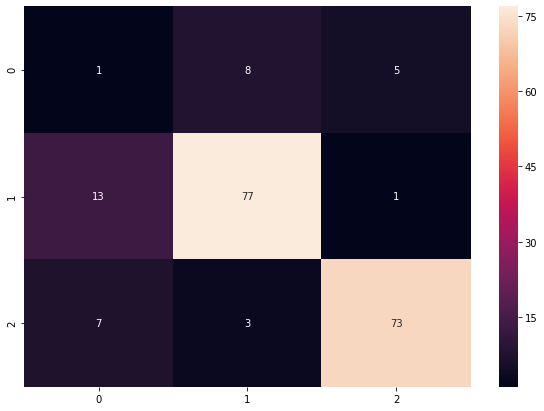

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(cf,annot=True)

In [17]:
from sklearn import tree

[Text(94.18393954918034, 209.07692307692307, 'X[2] <= 1.5\nentropy = 1.317\nsamples = 436\nvalue = [34, 197, 205]'),
 Text(28.128688524590164, 192.35076923076923, 'X[0] <= 1.5\nentropy = 0.725\nsamples = 87\nvalue = [3, 74, 10]'),
 Text(17.837704918032788, 175.62461538461537, 'X[1] <= 3.5\nentropy = 1.382\nsamples = 18\nvalue = [2, 9, 7]'),
 Text(10.97704918032787, 158.89846153846153, 'X[3] <= 2.5\nentropy = 1.241\nsamples = 11\nvalue = [1, 3, 7]'),
 Text(5.488524590163935, 142.1723076923077, 'X[1] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(2.7442622950819673, 125.44615384615385, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(8.232786885245902, 125.44615384615385, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(16.465573770491805, 142.1723076923077, 'X[1] <= 2.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 0, 6]'),
 Text(13.721311475409836, 125.44615384615385, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(19.20983606557377, 125.44615384615

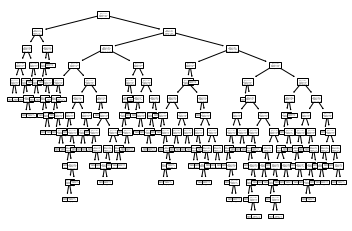

In [18]:
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [19]:
clf =clf_entropy.fit(x_train,y_train)

In [20]:
tree.export_graphviz(clf) 

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[2] <= 1.5\\nentropy = 1.317\\nsamples = 436\\nvalue = [34, 197, 205]"] ;\n1 [label="X[0] <= 1.5\\nentropy = 0.725\\nsamples = 87\\nvalue = [3, 74, 10]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[1] <= 3.5\\nentropy = 1.382\\nsamples = 18\\nvalue = [2, 9, 7]"] ;\n1 -> 2 ;\n3 [label="X[3] <= 2.5\\nentropy = 1.241\\nsamples = 11\\nvalue = [1, 3, 7]"] ;\n2 -> 3 ;\n4 [label="X[1] <= 1.5\\nentropy = 0.811\\nsamples = 4\\nvalue = [0, 3, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 3\\nvalue = [0, 3, 0]"] ;\n4 -> 6 ;\n7 [label="X[1] <= 2.5\\nentropy = 0.592\\nsamples = 7\\nvalue = [1, 0, 6]"] ;\n3 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 4\\nvalue = [0, 0, 4]"] ;\n7 -> 8 ;\n9 [label="X[3] <= 3.5\\nentropy = 0.918\\nsamples = 3\\nvalue = [1, 0, 2]"] ;\n7 -> 9 ;\n10 [label="entropy = 0.0\\nsamples = 1\\nvalue = [1, 0, 0]"] ;\n9 

In [21]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [22]:
graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

NameError: name 'estimator' is not defined